<a href="https://colab.research.google.com/github/laplaceconsulting/python_for_finance/blob/main/analise_eleicao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Análise dos anos de eleição

Benchmark IBOV
Portfólio 50% DOL/50% CDI

- Eleições 2006
- Eleições 2010
- Eleições 2014
- Eleições 2018

In [1]:
import pandas_datareader as wb
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt


In [49]:
pesos = np.array([0.5,0.5])

In [117]:
def carteira_eleicao(data_inicio, data_fim):
  ibov = wb.DataReader('^BVSP', data_source='yahoo', start=data_inicio, end=data_fim)['Adj Close']
  ibov = ibov.dropna()
  url='http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(12)
  cdi = pd.read_json(url)
  cdi['data']=pd.to_datetime(cdi['data'],dayfirst=True)
  cdi.set_index('data',inplace=True)
  cdi = cdi[data_inicio:data_fim]
  cdi = cdi.dropna()
  dol = wb.DataReader('USDBRL=X', data_source='yahoo', start =data_inicio, end=data_fim)['Adj Close']
  dol = dol.dropna()
  ano_total = pd.merge(cdi, dol, how='inner', left_index=True, right_index=True)
  cf_anualizado = ((ano_total.iloc[-1]-ano_total.iloc[0])/ano_total.iloc[0])
  cf_anualizado = ((1+cf_anualizado)**(12/12))-1
  cf_anualizado = cf_anualizado.dot(pesos)
  return cf_anualizado

In [118]:
def benchmark(data_inicio,data_fim):
  ibovespa = wb.DataReader('^BVSP', data_source='yahoo', start=data_inicio, end=data_fim)['Adj Close']
  ibovespa_anualizado = ((ibovespa.iloc[-1]-ibovespa.iloc[0])/ibovespa.iloc[0])
  return ibovespa_anualizado

In [143]:
def comparativo_cestas_acm(data_inicio,data_fim):
  cesta = pd.DataFrame()
  ibov = wb.DataReader('^BVSP', data_source='yahoo', start=data_inicio, end=data_fim)['Adj Close']
  ibov_ret = ibov.pct_change()
  ibov_ret = (1+ibov_ret).cumprod()
  cesta['IBOV'] = ibov_ret
  url='http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(12)
  cdi = pd.read_json(url)
  cdi['data']=pd.to_datetime(cdi['data'],dayfirst=True)
  cdi.set_index('data',inplace=True)
  cdi = (1+cdi[data_inicio:data_fim]/100).cumprod()
  cesta['CDI'] = cdi
  dol = wb.DataReader('USDBRL=X', data_source='yahoo', start =data_inicio, end=data_fim)['Adj Close']
  dol_ret = dol.pct_change()
  dol_ret = (1+dol_ret).cumprod()
  cesta['DOL'] = dol_ret
  return cesta.plot();

##Eleições 2006

Primeiro Turno 
- Lula 48,1% 
- Geraldo Alckmin 41,6% 
- Heloísa Helena 6,8%

Segundo Turno
- Lula 60,8% 
-Geraldo Alckmin 39,1%

In [160]:
inicio = '2006-01-01'
fim = '2006-12-31'

carteira_eleicao(data_inicio=inicio,data_fim=fim)

-0.099782486835789

In [161]:
benchmark(data_inicio=inicio, data_fim=fim)

0.32730474229265527

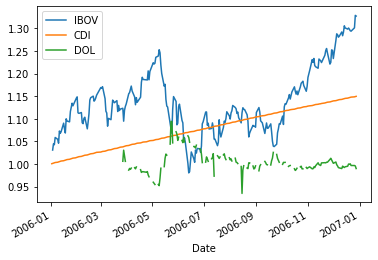

In [162]:
comparativo_cestas_acm(data_inicio=inicio, data_fim=fim)

##Eleições 2010

Primeiro Turno
- Dilma Roussef 46,9%
- Jose Serra 32,6%
- Marina Silva 19,3%

Segundo Turno
- Dilma Roussef 56%
- Jose Serra 44%

In [150]:
inicio = '2010-01-01'
fim = '2010-12-31'

carteira_eleicao(data_inicio=inicio, data_fim=fim)

0.09556213099105398

In [151]:
benchmark(data_inicio=inicio, data_fim=fim)

-0.010564637019059176

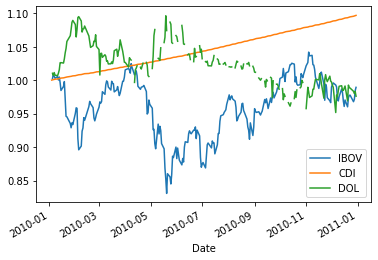

In [152]:
comparativo_cestas_acm(data_inicio=inicio, data_fim=fim)

##Eleições 2014

Primeiro Turno:
- Dilma Roussef 41,59%
- Aecio Neves 33,55%
- Marina Silva 21,32%

Segundo Turno
- Dilma Roussef 51,6%
- Aecio Neves 48,4%



In [153]:
inicio = '2014-01-01'
fim = '2014-12-31'

carteira_eleicao(data_inicio=inicio, data_fim=fim)

0.15026260423797055

In [154]:
benchmark(data_inicio=inicio, data_fim=fim)

-0.006634750998192328

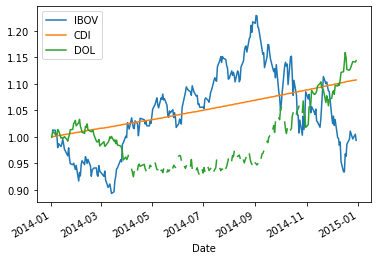

In [155]:
comparativo_cestas_acm(data_inicio=inicio, data_fim=fim)

##Eleições 2018

Primeiro Turno
- Jair Bolsonaro 46%
- Fernando Haddad 29,3%
- Ciro Gomes 12,4%

Segundo Turno

- Jair Bolsonaro 55,1%
- Fernando Haddad 44,9%

In [156]:
inicio = '2018-01-01'
fim = '2018-12-31'

In [157]:
carteira_eleicao(data_inicio=inicio, data_fim=fim)

0.05056185604571628

In [158]:
benchmark(data_inicio=inicio, data_fim=fim)

0.12833318355137308

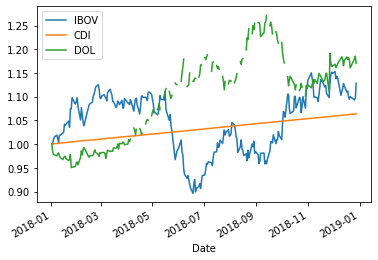

In [159]:
comparativo_cestas_acm(data_inicio=inicio, data_fim=fim)